# Inverse File

We import the libraries used

In [1]:
from pylab import *
from skimage import data
import scipy.sparse as sp
import scipy.sparse.linalg as sla
from operators import *
import matplotlib.pyplot as plt

Importing the image and selecting just a small part of the image
for testing and then visualizing the images

Original image size: (512, 512)
Selected image size: (50, 50)


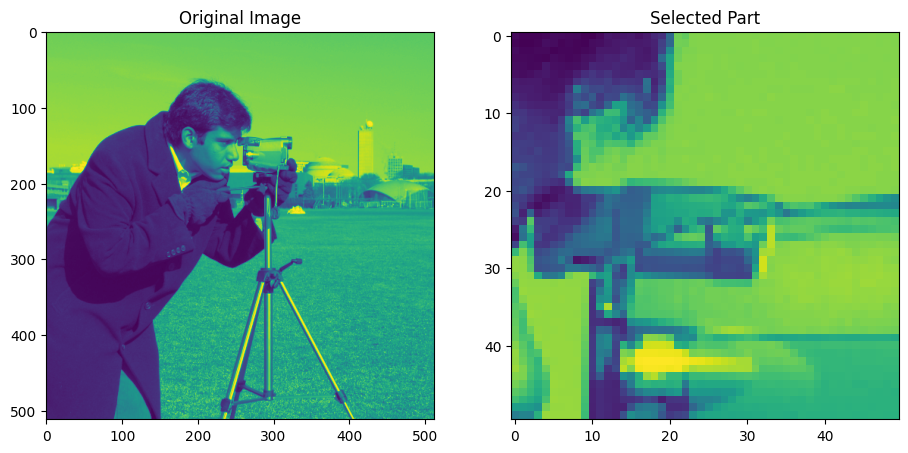

In [13]:
P = data.camera()
print(f"Original image size: {P.shape}")
# Select a small part of the image for testing.  Once your code is
# running, you can remove this line and work on the full image:
P = P[120:170,250:300]
print(f"Selected image size: {P.shape}")

fig, axs = subplots(1, 2, figsize=(11, 7))

# Display the original image
axs[0].imshow(data.camera()) # , cmap='gray'
axs[0].set_title('Original Image')

# Display the selected part of the image
axs[1].imshow(P) # , cmap='gray'
axs[1].set_title('Selected Part')

plt.show()

Setting the values for the test

In [14]:
n, m = P.shape
N = n*m
P = P.ravel()

# Matrix
B1 = blur_matrix(n, m)


r = 10 
eps = 10
B = B1**r ### Replace by faster version in Problem 7
eta = eps*(random(N)-0.5)
b = B@P + eta

### Blurred Image

Visualising the Selected Part from the Original image before and after blurring it.

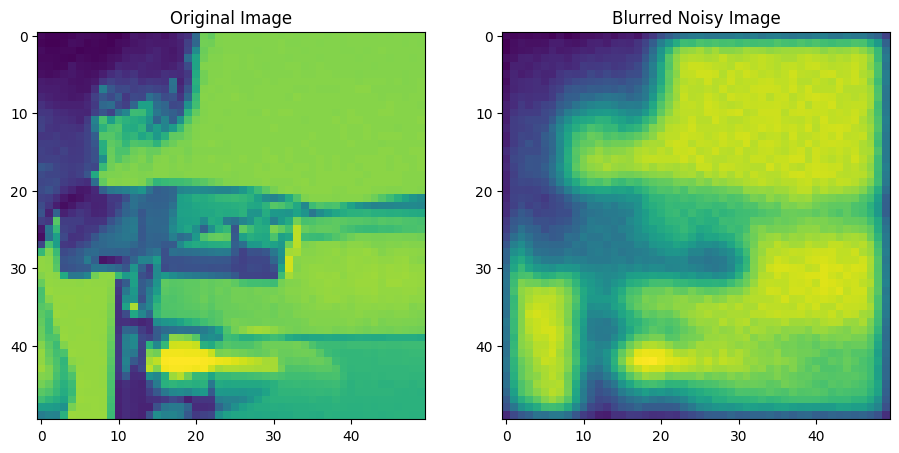

In [15]:
# We create two plots for comparing the images
# Printing first the Selected Image from the Original Image
fig, axs = subplots(1, 2, figsize=(11, 7))
axs[0].set_title('Original Image')
axs[0].imshow(P.reshape((n, m)))

# Applying and plotting the Blurred Noisy to the Image
axs[1].set_title('Blurred Noisy Image')
axs[1].imshow((B @ P).reshape((n, m)) + eta.reshape((n, m)))

### Tychonov-regularized reconstruction with alpha = 1e-8 

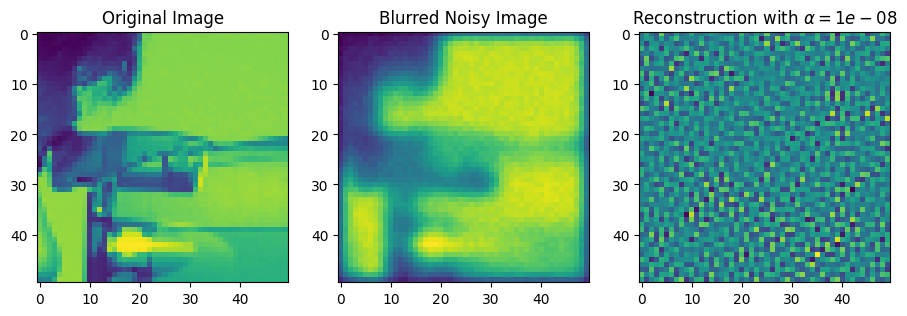

In [20]:
# We create three plots for comparing the original image, the blurred and the reconstructed one.
# Printing first the Selected Image from the Original Image
fig, axs = subplots(1, 3, figsize=(11, 7))
axs[0].set_title('Original Image')
axs[0].imshow(P.reshape((n, m)))

# Applying and plotting the Blurred Noisy to the Image
axs[1].set_title('Blurred Noisy Image')
axs[1].imshow((B @ P).reshape((n, m)) + eta.reshape((n, m)))

# Setting alpha to 1e-8 for the reconstruction
alpha = 1e-8

# Applying and plotting the Tychonov-regularized reconstruction with alpha = 1e-8 to the Blurred Image
axs[2].set_title(f'Reconstruction with $\\alpha={alpha:6.2g}$')
M, BT = tychonov_matrices(n, m, radius=r, alpha=alpha)
x_alpha = sla.cg(M, BT @ b)[0]
axs[2].imshow(x_alpha.reshape((n, m)))

### Tychonov-regularized reconstruction with alpha = 1e-4

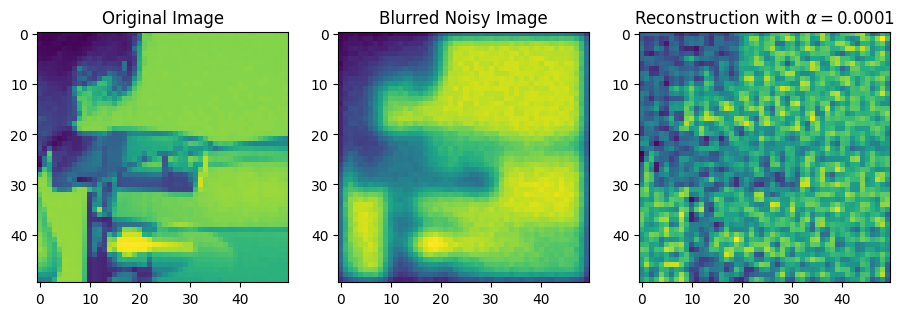

In [6]:
# We create three plots for comparing the original image, the blurred and the reconstructed one.
# Printing first the Selected Image from the Original Image
fig, axs = subplots(1, 3, figsize=(11, 7))
axs[0].set_title('Original Image')
axs[0].imshow(P.reshape((n, m)))

# Applying and plotting the Blurred Noisy to the Image
axs[1].set_title('Blurred Noisy Image')
axs[1].imshow((B @ P).reshape((n, m)) + eta.reshape((n, m)))

# Setting alpha to 1e-8 for the reconstruction
alpha = 1e-4

# Applying and plotting the Tychonov-regularized reconstruction with alpha = 1e-8 to the Blurred Image
axs[2].set_title(f'Reconstruction with $\\alpha={alpha:6.2g}$')
M, BT = tychonov_matrices(n, m, radius=r, alpha=alpha)
x_alpha = sla.cg(M, BT @ b)[0]
axs[2].imshow(x_alpha.reshape((n, m)))

### Tychonov-regularized reconstruction with alpha = 1e-1

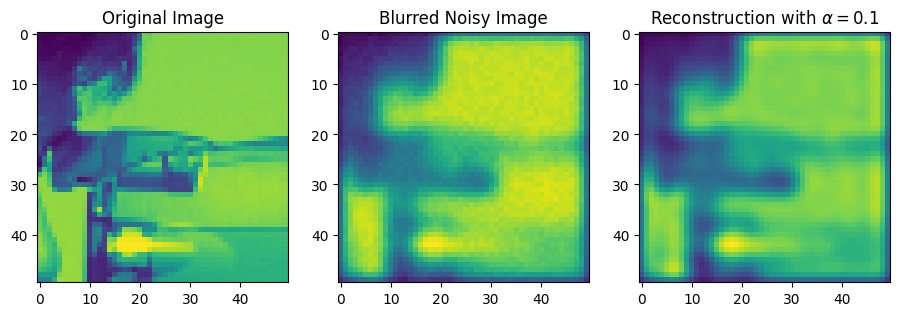

In [17]:
# We create three plots for comparing the original image, the blurred and the reconstructed one.
# Printing first the Selected Image from the Original Image
fig, axs = subplots(1, 3, figsize=(11, 7))
axs[0].set_title('Original Image')
axs[0].imshow(P.reshape((n, m)))

# Applying and plotting the Blurred Noisy to the Image
axs[1].set_title('Blurred Noisy Image')
axs[1].imshow((B @ P).reshape((n, m)) + eta.reshape((n, m)))

# Setting alpha to 1e-8 for the reconstruction
alpha = 1e-1

# Applying and plotting the Tychonov-regularized reconstruction with alpha = 1e-8 to the Blurred Image
axs[2].set_title(f'Reconstruction with $\\alpha={alpha:6.2g}$')
M, BT = tychonov_matrices(n, m, radius=r, alpha=alpha)
x_alpha = sla.cg(M, BT @ b)[0]
axs[2].imshow(x_alpha.reshape((n, m)))

### Tychonov-regularized reconstruction with aplha determined by Morozov principle *|| Bx_aplha - b || = ||n||*

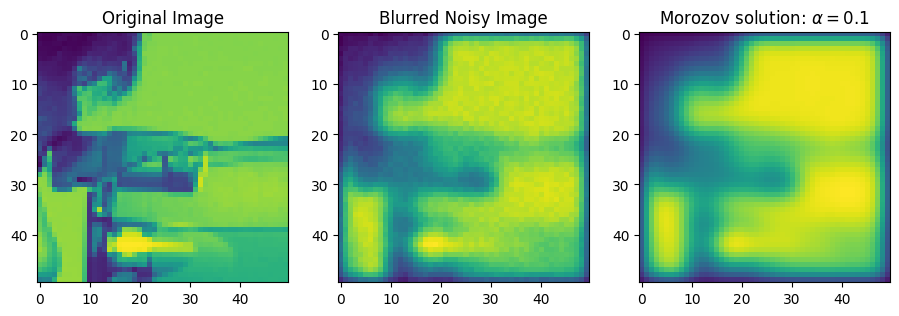

In [18]:
# We create three plots for comparing the original image, the blurred and the reconstructed one.
# Printing first the Selected Image from the Original Image
fig, axs = subplots(1, 3, figsize=(11, 7))
axs[0].set_title('Original Image')
axs[0].imshow(P.reshape((n, m)))

# Applying and plotting the Blurred Noisy to the Image
axs[1].set_title('Blurred Noisy Image')
axs[1].imshow((B @ P).reshape((n, m)) + eta.reshape((n, m)))

# Applying and plotting the Tychonov-regularized reconstruction with alpha determined by Morozov principle to the Blurred Image
axs[2].set_title(f'Morozov solution: $\\alpha={alpha:6.2g}$')
alpha_morozov = np.linalg.norm(eta)
M, BT = tychonov_matrices(n, m, radius=r, alpha=alpha_morozov)
x_morozov = sla.cg(M, BT @ b)[0]
axs[2].imshow(x_morozov.reshape((n, m)))

### Visualising all together

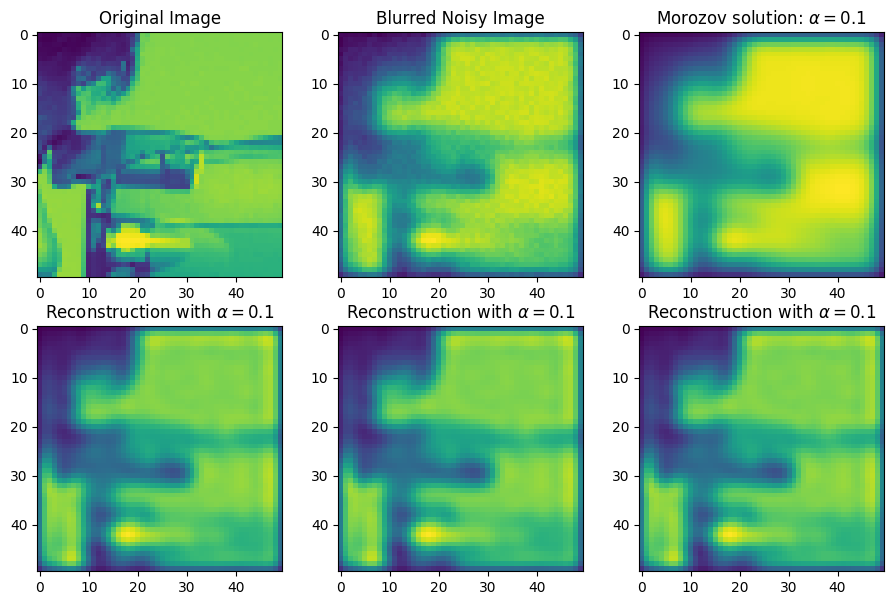

In [19]:
fig, axs = subplots(2, 3, figsize=(11, 7))
# Original 
axs[0, 0].set_title('Original Image')
axs[0, 0].imshow(P.reshape((n, m)))
# Blurred
axs[0, 1].set_title('Blurred Noisy Image')
axs[0, 1].imshow((B @ P).reshape((n, m)) + eta.reshape((n, m)))
# Reconstrucion with Tychonov-regularized reconstruction with alpha = 1e-8
axs[1, 0].set_title(f'Reconstruction with $\\alpha={alpha:6.2g}$')
axs[1, 0].imshow(x_alpha.reshape((n, m)))
# Reconstrucion with Tychonov-regularized reconstruction with alpha = 1e-4
axs[1, 1].set_title(f'Reconstruction with $\\alpha={alpha:6.2g}$')
axs[1, 1].imshow(x_alpha.reshape((n, m)))
# Reconstrucion with Tychonov-regularized reconstruction with alpha = 1e-1
axs[1, 2].set_title(f'Reconstruction with $\\alpha={alpha:6.2g}$')
axs[1, 2].imshow(x_alpha.reshape((n, m)))
# Reconstrucion with Tychonov-regularized reconstruction with aplha determined by Morozov principle *|| Bx_aplha - b || = ||n||*
axs[0, 2].set_title(f'Morozov solution: $\\alpha={alpha:6.2g}$')
axs[0, 2].imshow(x_morozov.reshape((n, m)))

# Timing

We import the time library to measure the time

In [21]:
import time

In [23]:
t0 = time.process_time()
B1 = blur_matrix(n, m)
t1 = time.process_time()
print("Time to call blur_matrix for the first time:", t1-t0)

Time to call blur_matrix for the first time: 0.0


### Tychonov_matrices and "spsolve" direct sparse solver 

In [27]:
t0 = time.process_time()
M, BT = tychonov_matrices(n, m, radius=r, alpha=1e-8)
reconstruction_result = sla.spsolve(M, BT @ b)
reconstructed_image_spsolve = reconstruction_result.reshape(n, m)
t1 = time.process_time()
print("Time using spsolve:", t1 - t0)

Time using spsolve: 1.8125


### Tychonov_matrices and the "cg" iterative conjugate gradient (CG) solver 

In [28]:
t0 = time.process_time()
M, BT = tychonov_matrices(n, m, radius=r, alpha=1e-8)
reconstruction_result_cg = sla.cg(M, BT @ b)[0]
reconstructed_image_cg = reconstruction_result_cg.reshape(n, m)
t1 = time.process_time()
print("Time using cg solver:", t1 - t0)


Time using cg solver: 1.84375


### Tychonov_operators and the "cg" iterative conjugate gradient (CG) solver

In [31]:
t0 = time.process_time()
M, BT = tychonov_operators(n, m, radius=r, alpha=1e-8)
reconstruction_result_cg_op = sla.cg(M, BT @ b)[0]
reconstructed_image_cg_op = reconstruction_result_cg_op.reshape(n, m)
t1 = time.process_time()
print("Time using cg solver with operators:", t1 - t0)

Time using cg solver with operators: 47.390625


### Problem 7

After running tychonov_matrices and tychonov_operators, we always get similar results for tychonov_matrices with spsolve and cg, they differ between 1.80 seconds and 3.5 seconds, but for tychonov_operators, most of the times we get between 40 and 60 seconds of process time, and just a few times we get a few seconds, the best performance we had
was 1.828215 seconds
After this observations we gonna use tychonov_matrices with spsolve

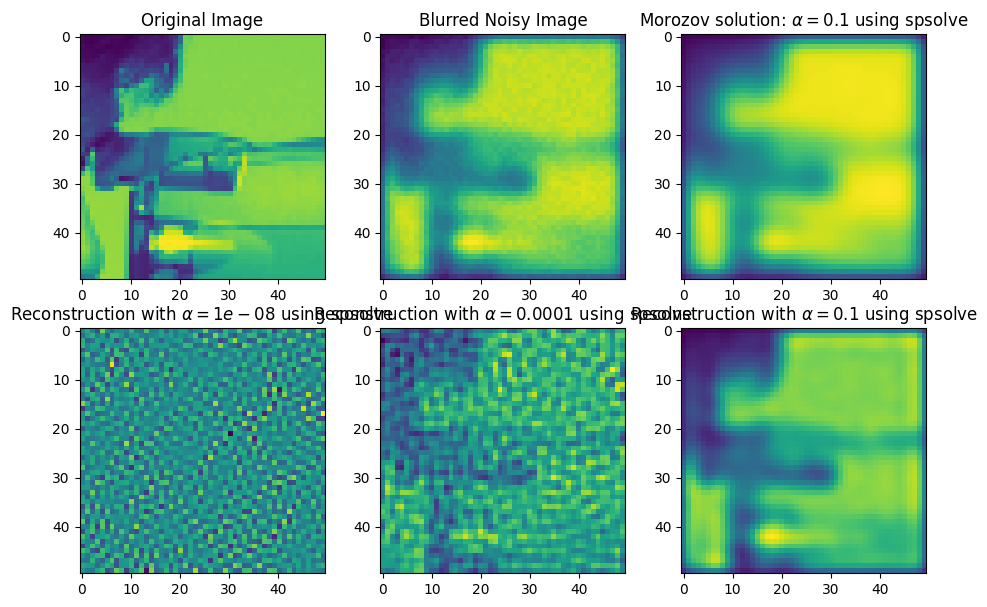

In [47]:
fig, axs = subplots(2, 3, figsize=(11, 7))

# Original
axs[0, 0].set_title('Original Image')
axs[0, 0].imshow(P.reshape((n, m)))
# Blurred
axs[0, 1].set_title('Blurred Noisy Image')
axs[0, 1].imshow((B @ P).reshape((n, m)) + eta.reshape((n, m)))
# Reconstrucion with Tychonov-regularized reconstruction with alpha = 1e-8 using spsolve
alpha = 1e-8
axs[1, 0].set_title(f'Reconstruction with $\\alpha={alpha:6.2g}$ using spsolve')
M, BT = tychonov_matrices(n, m, radius=r, alpha=alpha)
reconstruction_result = sla.spsolve(M, BT @ b)
x_alpha = reconstruction_result.reshape((n, m))
axs[1, 0].imshow(x_alpha)

# Reconstrucion with Tychonov-regularized reconstruction with alpha = 1e-4 using spsolve
alpha = 1e-4
axs[1, 1].set_title(f'Reconstruction with $\\alpha={alpha:6.2g}$ using spsolve')
M, BT = tychonov_matrices(n, m, radius=r, alpha=alpha)
reconstruction_result = sla.spsolve(M, BT @ b)
x_alpha = reconstruction_result.reshape((n, m))
axs[1, 1].imshow(x_alpha)

# Reconstrucion with Tychonov-regularized reconstruction with alpha = 1e-1 using spsolve
alpha = 1e-1
axs[1, 2].set_title(f'Reconstruction with $\\alpha={alpha:6.2g}$ using spsolve')
M, BT = tychonov_matrices(n, m, radius=r, alpha=alpha)
reconstruction_result = sla.spsolve(M, BT @ b)
x_alpha = reconstruction_result.reshape((n, m))
axs[1, 2].imshow(x_alpha)

# Reconstrucion with Tychonov-regularized reconstruction with alpha determined by Morozov principle
# || Bx_aplha - b || = ||n||
axs[0, 2].set_title(f'Morozov solution: $\\alpha={alpha:6.2g}$ using spsolve')
M, BT = tychonov_matrices(n, m, radius=r, alpha=alpha_morozov)
reconstruction_result = sla.spsolve(M, BT @ b)
x_morozov = reconstruction_result.reshape((n, m))
axs[0, 2].imshow(x_morozov)

